In [6]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [34]:
iris = load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

In [8]:
# CREAR EL FLUJO DE TRABAJO y PIPELINE CON POLYNOMIAL FEATURES
from sklearn.preprocessing import PolynomialFeatures

svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

In [40]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
# svm_clf.fit(X,y)
# svm_clf.predict([[5.5, 1.7]])
# plt.plot(X,y, '.')
X_, y_ = make_moons()

((100, 2), (100,))

In [2]:
from sklearn.datasets import fetch_openml
import pandas as pd
mnist = fetch_openml('mnist_784', version=1)

In [3]:
X, y= mnist['data'], mnist['target']

X_numpy = X.to_numpy()

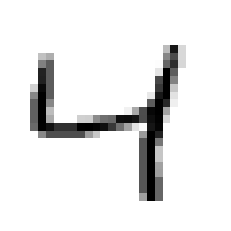

In [31]:
import matplotlib.pyplot as plt
import matplotlib as mpl

some_digit = X_numpy[2]
image = some_digit.reshape(28,28)

plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
import numpy as np
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [11]:
from sklearn.multiclass import OneVsOneClassifier

svclass = LinearSVC(C=1, dual=False, max_iter=5000)
ovo_clf = OneVsOneClassifier(svclass)
ovo_clf.fit(X_train, y_train)


OneVsOneClassifier(estimator=LinearSVC(C=1, dual=False, max_iter=5000))

In [33]:
y_pred = ovo_clf.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score

accuracy_score(y_test, y_pred)

0.9263